In [1]:
# https://www.kaggle.com/datasets/usdot/flight-delays

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [3]:
path_flights = r'C:\Users\Emoş\Desktop\veriMaden proje\archive\flights.csv'
path_airports = r'C:\Users\Emoş\Desktop\veriMaden proje\archive\airports.csv'
path_airlines = r'C:\Users\Emoş\Desktop\veriMaden proje\archive\airlines.csv'

In [4]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosunun boyutu : {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosunun boyutu : {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosunun boyutu : {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya yok. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata . ({e})")
        return None, None, None

print("fonksiyon tanımlandı.")

fonksiyon tanımlandı.


In [5]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


# Airports Veri Analizi

In [6]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [8]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [10]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [11]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


# Airlines Veri Analizi

In [12]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [13]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [14]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [15]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [16]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


# Flights Veri Analizi

In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [21]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [22]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [23]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("fonksiyon tanımlandı.")

fonksiyon tanımlandı.


In [27]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'] = X_train[col + '_ENCODED'].fillna(global_mean)
        X_test[col + '_ENCODED']  = X_test[col + '_ENCODED'].fillna(global_mean)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("fonksiyon tanımlandı.")

fonksiyon tanımlandı.


In [28]:
BASE_PATH = r'C:\Users\Emoş\Desktop\veriMaden proje\archive'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


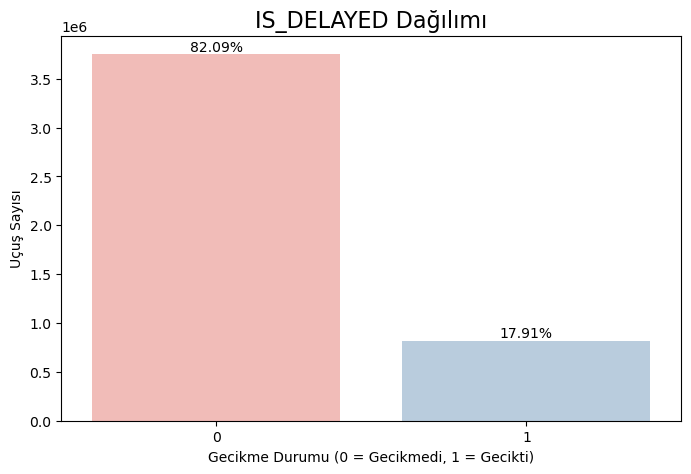


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


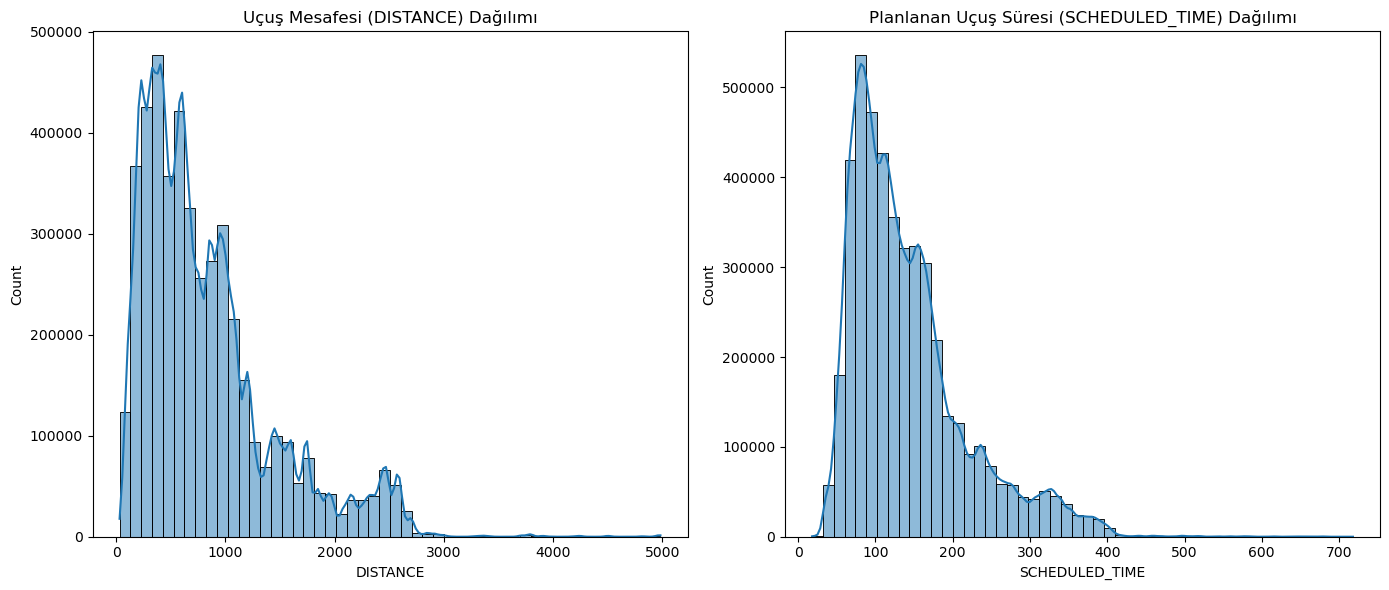


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


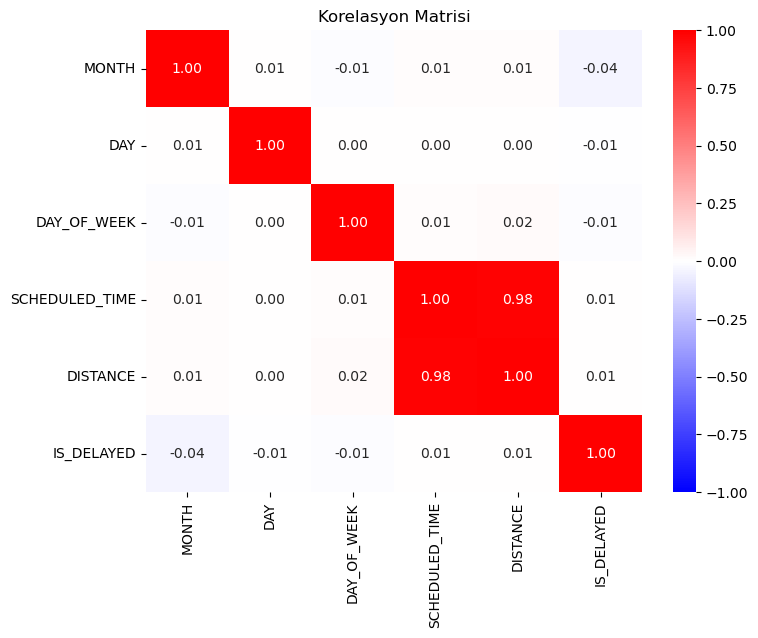

In [29]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df,  palette="Pastel1")
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı') 
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # Korelasyon
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

    if 'IS_DELAYED' in numeric_features:
        numeric_features.remove('IS_DELAYED')
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
   
    corr_df = train_df[numeric_features + ['IS_DELAYED']].dropna().corr()    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='bwr', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [30]:
import warnings

# FutureWarning türündeki tüm uyarıları görmezden gel (Gizle)
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
 
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [31]:
from sklearn.metrics import average_precision_score, mean_absolute_error

if 'X_train_encoded' in locals():

    print("DummyClassifier")

    dummy_model = DummyClassifier(strategy='most_frequent')
    dummy_model.fit(X_train_encoded, y_train)

    y_pred_dummy = dummy_model.predict(X_test_encoded)
    y_proba_dummy = dummy_model.predict_proba(X_test_encoded)[:, 1]

    # Metrikler
    acc_dummy = accuracy_score(y_test, y_pred_dummy) * 100
    roc_dummy = roc_auc_score(y_test, y_proba_dummy) * 100
    pr_dummy = average_precision_score(y_test, y_proba_dummy) * 100
    mae_dummy = mean_absolute_error(y_test, y_proba_dummy)*100

    print(f"Dummy Model Test Doğruluk Oranı : {acc_dummy:.2f}%")
    print(f"Dummy Model ROC-AUC            : {roc_dummy:.2f}%")
    print(f"Dummy Model PR-AUC             : {pr_dummy:.2f}%")
    print(f"Dummy Model MAE                : {mae_dummy:.2f}%")

    print("\nDummy Model Sınıflandırma Raporu:\n")
    print(classification_report(y_test, y_pred_dummy, zero_division=0))

else:
    print("HATA: X_train_encoded bulunamadı.")



DummyClassifier
Dummy Model Test Doğruluk Oranı : 82.09%
Dummy Model ROC-AUC            : 50.00%
Dummy Model PR-AUC             : 17.91%
Dummy Model MAE                : 17.91%

Dummy Model Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871



In [32]:
# GAUSSIAN NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error
)

print("GAUSSIAN NAIVE BAYES")
gnb = GaussianNB()
gnb.fit(X_train_encoded, y_train)
y_pred_gnb = gnb.predict(X_test_encoded)
y_proba_gnb = gnb.predict_proba(X_test_encoded)[:, 1] 
acc_gnb = accuracy_score(y_test, y_pred_gnb) * 100
roc_auc_gnb = roc_auc_score(y_test, y_proba_gnb) * 100
pr_auc_gnb = average_precision_score(y_test, y_proba_gnb) * 100
mae_gnb = mean_absolute_error(y_test, y_proba_gnb)*100

print(f"Model Test Doğruluk Oranı : {acc_gnb:.2f}%")
print(f"Model ROC-AUC            : {roc_auc_gnb:.2f}%")
print(f"Model PR-AUC             : {pr_auc_gnb:.2f}%")
print(f"Model MAE                : {mae_gnb:.2f}%")

print("\nGaussian NB Model Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_gnb, zero_division=0))



GAUSSIAN NAIVE BAYES
Model Test Doğruluk Oranı : 72.87%
Model ROC-AUC            : 61.42%
Model PR-AUC             : 24.07%
Model MAE                : 33.84%

Gaussian NB Model Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83    938225
           1       0.25      0.26      0.25    204646

    accuracy                           0.73   1142871
   macro avg       0.54      0.54      0.54   1142871
weighted avg       0.73      0.73      0.73   1142871



In [34]:
import warnings
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error
)

warnings.simplefilter(action='ignore', category=FutureWarning)

if 'X_train_encoded' in locals() and 'X_test_encoded' in locals() and 'y_train' in locals() and 'y_test' in locals():
    print("FEATURE SELECTION Korelasyon Tabanlı")

    print("Özellikler korelasyon analizi ile seçiliyor...")

    corr_matrix = X_train_encoded.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    threshold = 0.90
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    selected_names = [col for col in X_train_encoded.columns if col not in to_drop]

    print(f"\nToplam özellik sayısı          : {X_train_encoded.shape[1]}")
    print(f"Yüksek korelasyon sebebiyle atılan özellik sayısı: {len(to_drop)}")
    print(f"Seçilen (kalan) özellik sayısı : {len(selected_names)}")

    print("\nAtılan özellikler:")
    for i, name in enumerate(to_drop, 1):
        print(f"{i}. {name}")

    print("\nKalan / kullanılan özellikler:")
    for i, name in enumerate(selected_names, 1):
        print(f"{i}. {name}")
    X_train_fs = X_train_encoded[selected_names]
    X_test_fs = X_test_encoded[selected_names]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fs)
    X_test_scaled = scaler.transform(X_test_fs)

    X_train_selected = X_train_scaled
    X_test_selected = X_test_scaled

    print("DummyClassifier")

    dummy_fs = DummyClassifier(strategy='most_frequent')
    dummy_fs.fit(X_train_selected, y_train)

    y_pred_dummy_fs = dummy_fs.predict(X_test_selected)
    y_proba_dummy_fs = dummy_fs.predict_proba(X_test_selected)[:, 1]

    acc_dummy = accuracy_score(y_test, y_pred_dummy_fs) * 100
    auc_dummy = roc_auc_score(y_test, y_proba_dummy_fs) * 100
    pr_dummy  = average_precision_score(y_test, y_proba_dummy_fs) * 100
    mae_dummy = mean_absolute_error(y_test, y_proba_dummy_fs)*100

    print(f"Dummy Accuracy : {acc_dummy:.2f}%")
    print(f"Dummy ROC-AUC  : {auc_dummy:.2f}%")
    print(f"Dummy PR-AUC   : {pr_dummy:.2f}%")
    print(f"Dummy MAE      : {mae_dummy:.2f}%")

    print("\nDummy Sınıflandırma Raporu:\n")
    print(classification_report(y_test, y_pred_dummy_fs, zero_division=0))

    print("Gaussian NB")

    gnb_fs = GaussianNB()
    gnb_fs.fit(X_train_selected, y_train)

    y_pred_gnb_fs = gnb_fs.predict(X_test_selected)
    y_proba_gnb_fs = gnb_fs.predict_proba(X_test_selected)[:, 1]

    acc_gnb_fs = accuracy_score(y_test, y_pred_gnb_fs) * 100
    auc_gnb = roc_auc_score(y_test, y_proba_gnb_fs) * 100
    pr_gnb  = average_precision_score(y_test, y_proba_gnb_fs) * 100
    mae_gnb = mean_absolute_error(y_test, y_proba_gnb_fs)*100

    print(f"Gaussian NB Accuracy : {acc_gnb_fs:.2f}%")
    print(f"Gaussian NB ROC-AUC  : {auc_gnb:.2f}%")
    print(f"Gaussian NB PR-AUC   : {pr_gnb:.2f}%")
    print(f"Gaussian NB MAE      : {mae_gnb:.2f}%")

    print("\nGaussian NB Sınıflandırma Raporu:\n")
    print(classification_report(y_test, y_pred_gnb_fs, zero_division=0))

else:
    print("HATA")



FEATURE SELECTION Korelasyon Tabanlı
Özellikler korelasyon analizi ile seçiliyor...

Toplam özellik sayısı          : 26
Yüksek korelasyon sebebiyle atılan özellik sayısı: 1
Seçilen (kalan) özellik sayısı : 25

Atılan özellikler:
1. DISTANCE

Kalan / kullanılan özellikler:
1. MONTH
2. DAY
3. DAY_OF_WEEK
4. SCHEDULED_TIME
5. ORIGIN_AIRPORT_ENCODED
6. DESTINATION_AIRPORT_ENCODED
7. AIRLINE_AA
8. AIRLINE_AS
9. AIRLINE_B6
10. AIRLINE_DL
11. AIRLINE_EV
12. AIRLINE_F9
13. AIRLINE_HA
14. AIRLINE_MQ
15. AIRLINE_NK
16. AIRLINE_OO
17. AIRLINE_UA
18. AIRLINE_US
19. AIRLINE_VX
20. AIRLINE_WN
21. TIME_OF_DAY_Gece (00-05)
22. TIME_OF_DAY_Sabah (06-11)
23. TIME_OF_DAY_Öğle (12-16)
24. TIME_OF_DAY_Akşam (17-20)
25. TIME_OF_DAY_Gece Yarısı (21-23)
DummyClassifier
Dummy Accuracy : 82.09%
Dummy ROC-AUC  : 50.00%
Dummy PR-AUC   : 17.91%
Dummy MAE      : 17.91%

Dummy Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
        

In [35]:
print(f"Dummy Model Test Doğruluk Oranı: {accuracy_score(y_test, y_pred_dummy) * 100:.2f}%")
print(f"Model Test Doğruluk Oranı : {accuracy_score(y_test, y_pred_gnb) * 100:.2f}%")
print(f"Gaussian NB (Feature selection sonrası) Test Doğruluk Oranı: {acc_gnb_fs :.2f}%")
print(f"Dummy (Feature selection sonrası) Test Doğruluk Oranı: {accuracy_score(y_test, y_pred_dummy_fs) * 100:.2f}%")

Dummy Model Test Doğruluk Oranı: 82.09%
Model Test Doğruluk Oranı : 72.87%
Gaussian NB (Feature selection sonrası) Test Doğruluk Oranı: 72.36%
Dummy (Feature selection sonrası) Test Doğruluk Oranı: 82.09%


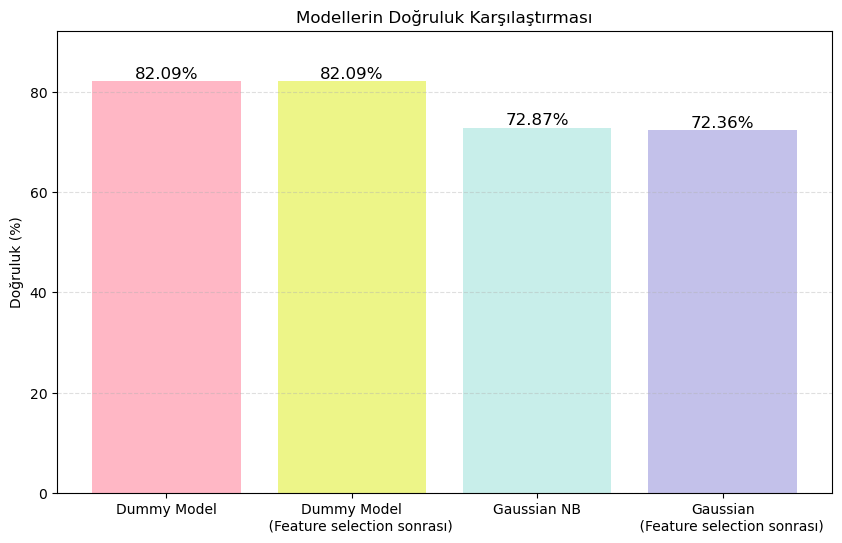

In [36]:
dummy_acc = accuracy_score(y_test, y_pred_dummy) * 100
gnb_acc = accuracy_score(y_test, y_pred_gnb) * 100
gnb_fs_acc = acc_gnb_fs
dummy_fs_acc = accuracy_score(y_test, y_pred_dummy_fs) * 100
model_names = [
    "Dummy Model",
    '''Dummy Model
    (Feature selection sonrası)''',
    "Gaussian NB",
    '''Gaussian
    (Feature selection sonrası)'''   
]

accuracies = [
    dummy_acc,
    dummy_fs_acc,
    gnb_acc,
    gnb_fs_acc,
]

plt.figure(figsize=(10, 6))
colors = ["#ffb7c5", "#edf588", "#c8eeea", "#c3c1ea"]
bars = plt.bar(model_names, accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", 
             ha='center', fontsize=12)

plt.ylabel("Doğruluk (%)")
plt.title("Modellerin Doğruluk Karşılaştırması")
plt.ylim(0, max(accuracies) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error
)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

if 'X_train_encoded' in locals() and 'X_test_encoded' in locals() and 'y_train' in locals() and 'y_test' in locals():
    print("BOYUT İNDİRGEME LDA")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    print("LDA ile boyut indirgeme yapılıyor...")

    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train_selected = lda.fit_transform(X_train_scaled, y_train)
    X_test_selected = lda.transform(X_test_scaled)

    print(f"\nOrijinal özellik sayısı : {X_train_encoded.shape[1]}")
    print(f"LDA sonrası özellik sayısı: {X_train_selected.shape[1]}")

    print("DummyClassifier")
    dummy_fs = DummyClassifier(strategy='most_frequent')
    dummy_fs.fit(X_train_selected, y_train)
    y_pred_dummy_fs = dummy_fs.predict(X_test_selected)

    y_proba_dummy = dummy_fs.predict_proba(X_test_selected)[:, 1]
    auc_dummy = roc_auc_score(y_test, y_proba_dummy) * 100
    pr_dummy = average_precision_score(y_test, y_proba_dummy) * 100
    mae_dummy = mean_absolute_error(y_test, y_proba_dummy)*100

    acc_dummy = accuracy_score(y_test, y_pred_dummy_fs) * 100

    print(f"Dummy LDA Sonrası Test Doğruluk Oranı: {acc_dummy:.2f}%")
    print(f"Dummy LDA Sonrası ROC-AUC          : {auc_dummy:.2f}%")
    print(f"Dummy LDA Sonrası PR-AUC           : {pr_dummy:.2f}%")
    print(f"Dummy LDA Sonrası MAE              : {mae_dummy:.2f}")

    print("\nDummy LDA Sonrası Sınıflandırma Raporu:\n")
    print(classification_report(y_test, y_pred_dummy_fs, zero_division=0))

    print("Gaussian Naive Bayes")
    gnb_fs = GaussianNB()
    gnb_fs.fit(X_train_selected, y_train)
    y_pred_gnb_fs = gnb_fs.predict(X_test_selected)
    y_proba_gnb = gnb_fs.predict_proba(X_test_selected)[:, 1]
    auc_gnb = roc_auc_score(y_test, y_proba_gnb) * 100
    pr_gnb = average_precision_score(y_test, y_proba_gnb) * 100
    mae_gnb = mean_absolute_error(y_test, y_proba_gnb)*100
    acc_gnb_fs = accuracy_score(y_test, y_pred_gnb_fs) * 100

    print(f"Gaussian NB LDA Sonrası Test Doğruluk Oranı: {acc_gnb_fs:.2f}%")
    print(f"Gaussian NB LDA Sonrası ROC-AUC          : {auc_gnb:.2f}%")
    print(f"Gaussian NB LDA Sonrası PR-AUC           : {pr_gnb:.2f}%")
    print(f"Gaussian NB LDA Sonrası MAE              : {mae_gnb:.2f}")

    print("\nGaussian NB LDA Sonrası Sınıflandırma Raporu:\n")
    print(classification_report(y_test, y_pred_gnb_fs, zero_division=0))

else:
    print("HATA")


BOYUT İNDİRGEME LDA
LDA ile boyut indirgeme yapılıyor...

Orijinal özellik sayısı : 26
LDA sonrası özellik sayısı: 1
DummyClassifier
Dummy LDA Sonrası Test Doğruluk Oranı: 82.09%
Dummy LDA Sonrası ROC-AUC          : 50.00%
Dummy LDA Sonrası PR-AUC           : 17.91%
Dummy LDA Sonrası MAE              : 17.91

Dummy LDA Sonrası Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871

Gaussian Naive Bayes
Gaussian NB LDA Sonrası Test Doğruluk Oranı: 82.09%
Gaussian NB LDA Sonrası ROC-AUC          : 63.55%
Gaussian NB LDA Sonrası PR-AUC           : 26.12%
Gaussian NB LDA Sonrası MAE              : 28.44

Gaussian NB LDA Sonrası Sınıflandırma Raporu:

              precision    recall  f1-score   suppo

In [38]:
print(f"Dummy Model Test Doğruluk Oranı: {accuracy_score(y_test, y_pred_dummy) * 100:.2f}%")
print(f"Model Test Doğruluk Oranı : {acc_gnb:.2f}%")
print(f"Dummy LDA Sonrası Test Doğruluk Oranı: {accuracy_score(y_test, y_pred_dummy_fs) * 100:.2f}%")
print(f"Gaussian NB LDA Sonrası Test Doğruluk Oranı: {acc_gnb_fs:.2f}%")

Dummy Model Test Doğruluk Oranı: 82.09%
Model Test Doğruluk Oranı : 72.87%
Dummy LDA Sonrası Test Doğruluk Oranı: 82.09%
Gaussian NB LDA Sonrası Test Doğruluk Oranı: 82.09%


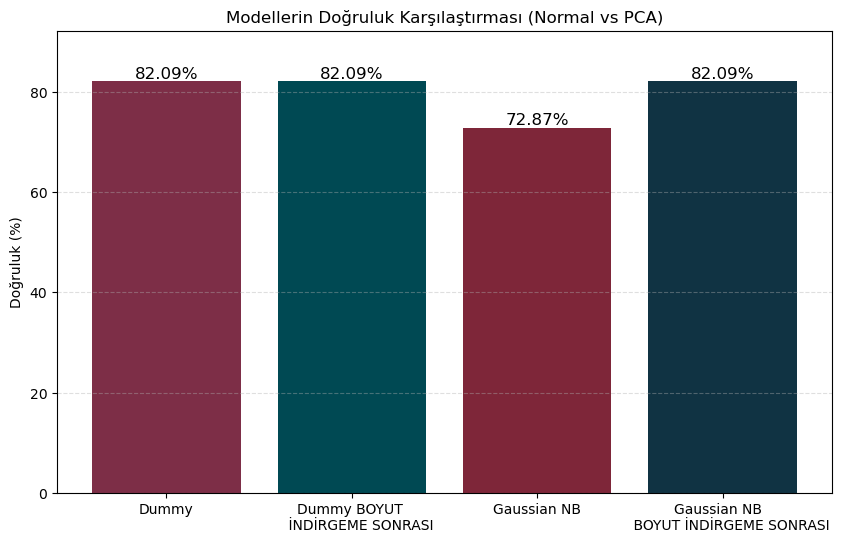

In [39]:
import matplotlib.pyplot as plt
dummy_acc = accuracy_score(y_test, y_pred_dummy) * 100
gnb_acc = acc_gnb
dummy_pca_acc = accuracy_score(y_test, y_pred_dummy_fs) * 100
gnb_pca_acc = acc_gnb_fs
model_names = [
    "Dummy",
    '''Dummy BOYUT 
    İNDİRGEME SONRASI''',
    "Gaussian NB",
    '''Gaussian NB  
    BOYUT İNDİRGEME SONRASI'''
]
accuracies = [
    dummy_acc,
    dummy_pca_acc,
    gnb_acc,
    gnb_pca_acc
]
colors = ["#7d2e47", "#004953", "#7e2639", "#103343"]
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", 
             ha='center', fontsize=12)

plt.ylabel("Doğruluk (%)")
plt.title("Modellerin Doğruluk Karşılaştırması (Normal vs PCA)")
plt.ylim(0, max(accuracies) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


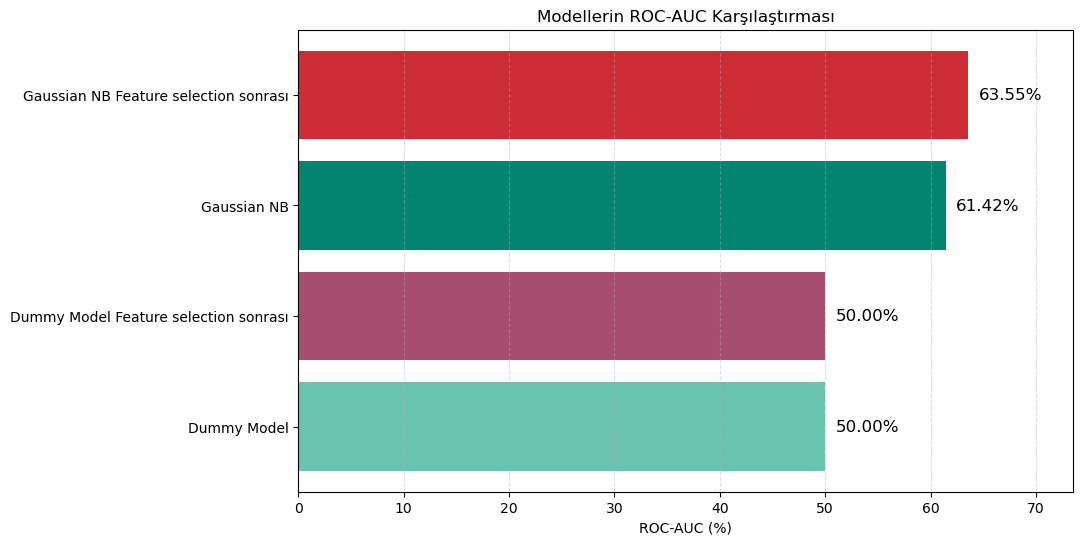

In [41]:
dummy_auc_pct = auc_dummy
dummy_fs_auc_pct = auc_dummy 
gnb_auc_pct = roc_auc_gnb
gnb_fs_auc_pct = auc_gnb
model_names = [
    "Dummy Model",
    "Dummy Model Feature selection sonrası",
    "Gaussian NB",
    "Gaussian NB Feature selection sonrası"
]
auc_scores = [
    dummy_auc_pct,
    dummy_fs_auc_pct,
    gnb_auc_pct,
    gnb_fs_auc_pct
]
plt.figure(figsize=(10, 6))
colors = ["#68c4af", "#a64d70", "#028471", "#cc2c34"]
bars = plt.barh(model_names, auc_scores, color=colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=12)

plt.xlabel("ROC-AUC (%)")
plt.title("Modellerin ROC-AUC Karşılaştırması")
plt.xlim(0, max(auc_scores) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()            


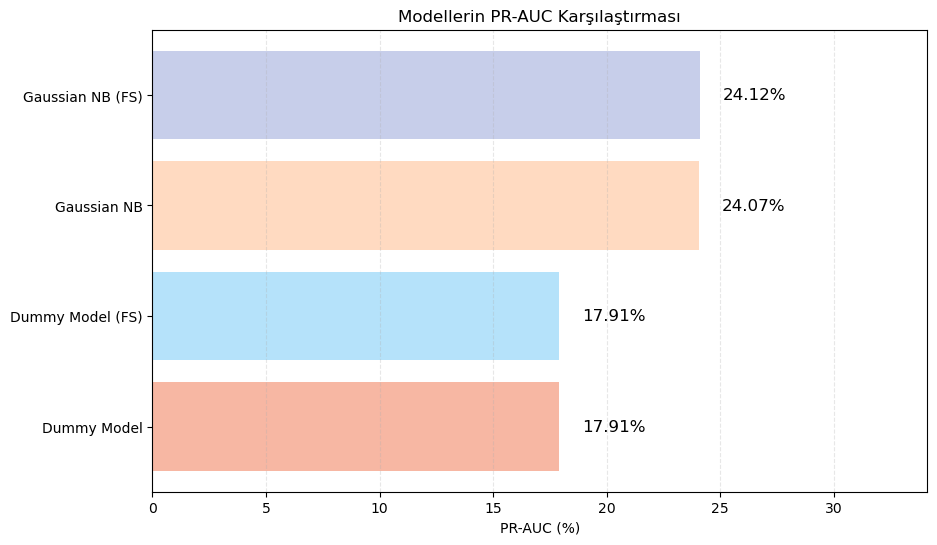

In [42]:
dummy_pr_pct = pr_dummy
dummy_fs_pr_pct = pr_dummy 
gnb_pr_pct = pr_auc_gnb
gnb_fs_pr_pct = average_precision_score(y_test, y_proba_gnb_fs) * 100
model_names = [
    "Dummy Model",
    "Dummy Model (FS)",
    "Gaussian NB",
    "Gaussian NB (FS)"
]

pr_auc_scores = [
    dummy_pr_pct,
    dummy_fs_pr_pct,
    gnb_pr_pct,
    gnb_fs_pr_pct
]
plt.figure(figsize=(10, 6))
colors = ["#f7b7a3", "#b5e2fa", "#ffdac1", "#c7ceea"]
bars = plt.barh(model_names, pr_auc_scores, color=colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}%", va='center', fontsize=12)

plt.xlabel("PR-AUC (%)")
plt.title("Modellerin PR-AUC Karşılaştırması")
plt.xlim(0, max(pr_auc_scores) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.show()


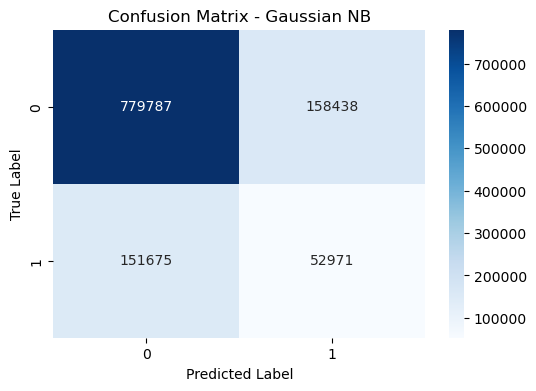


Confusion Matrix Gaussian NB
[[779787 158438]
 [151675  52971]]


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nConfusion Matrix Gaussian NB")
print(cm_gnb)


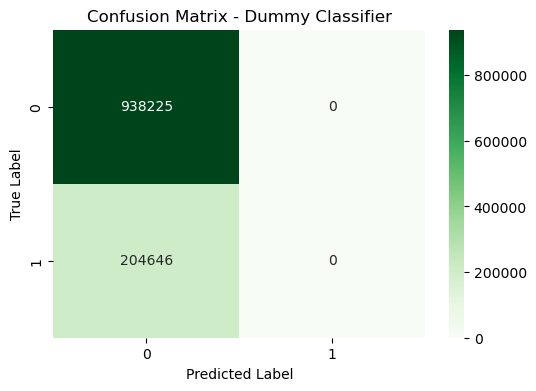


Confusion Matrix Dummy Model
[[938225      0]
 [204646      0]]


In [44]:
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dummy, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nConfusion Matrix Dummy Model")
print(cm_dummy)
